In [10]:
import sys
sys.path.append('../src')
from numpy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
from Params import *
from NeutrinoFuncs import *
from PlotFuncs import *
from Like import *
import cmasher as cmr
from matplotlib.colors import LinearSegmentedColormap

interval = linspace(0.12,0.9)
colors = cmr.pride(interval)
cmap = LinearSegmentedColormap.from_list('name', colors)

data = loadtxt('../data/WIMPLimits/mylimits/DLNuFloorXe_detailed_SI.txt')
Ex = flipud(data[1:,1:])
m,sig,NUFLOOR,DY = Floor_2D(data)

../src/Like.py:68: RuntimeWarning: invalid value encountered in greater
  Exmin = amin(Ex[Ex>0])
../src/Like.py:93: RuntimeWarning: invalid value encountered in less
  DY[DY<2] = 2


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater


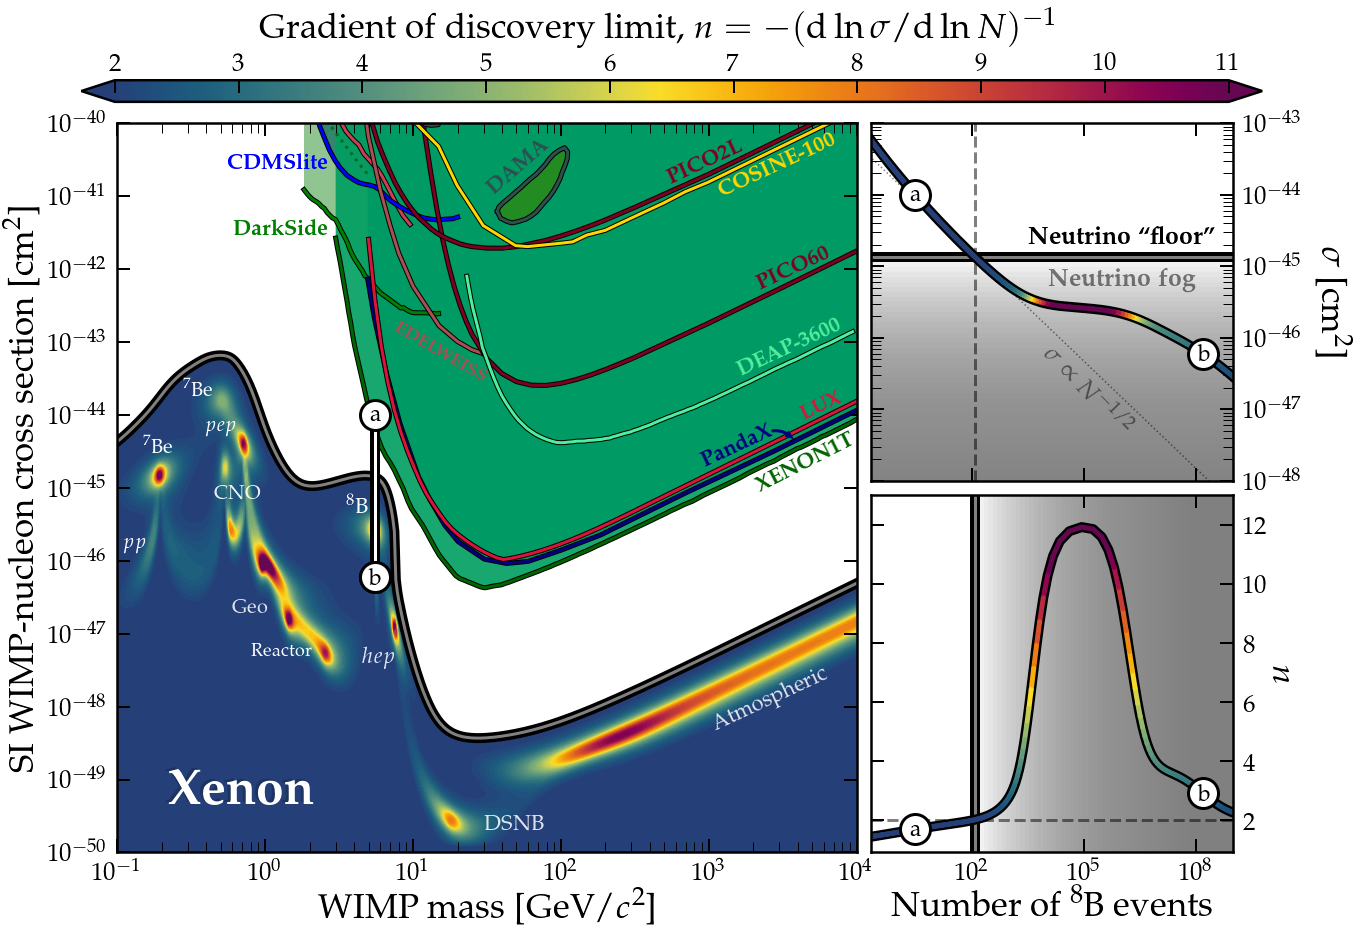

In [19]:
R = sum(BinnedNeutrinoRates(1.0e-4,200.0,50,Xe131,NuFlux)[5])

pek = line_background(10,'k')
#cmap = cmr.pride  
nmax = 13
vmax = 11
vmin = 2
m_example = 5.5

# Figure setup
import matplotlib.gridspec as gridspec
lw = 2.5
lfs = 35
tfs = 25
plt.rcParams['axes.linewidth'] = lw
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=tfs)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']
fig = plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 3)
gs.update(wspace=0.04)
gs.update(hspace=0.04)
ax1 = plt.subplot(gs[:,0:2])
ax2 = plt.subplot(gs[0,-1])
ax3 = plt.subplot(gs[1,-1])

# Plot limits
SILimits(ax1,Annotations=False)


# Plot neutrino fog
col_min = cmap(0.0)
cnt = ax1.contourf(m,sig,DY,levels=linspace(2,15,100),vmin=2.3,vmax=vmax,cmap=cmap,zorder=-100)
for c in cnt.collections: c.set_edgecolor("face")
ax1.plot(m,NUFLOOR,'-',color='gray',lw=3,path_effects=pek,zorder=1)
ax1.fill_between(m,NUFLOOR,y2=1e-99,color=col_min,zorder=-1000)


# Plot single mass example line
x1 = m_example
x2 = m_example
y1 = 1e-44
y2 = 6e-47

# Calculate derivative of discovery limit
i = argmin(abs(m-m_example))
E = Ex[:,i]*R
y = gaussian_filter1d(gaussian_filter1d(log10(E),sigma=3),3)
dy = -gradient(y,log10(sig[2])-log10(sig[1]))
dy = gaussian_filter1d(dy,3) 

ax1.plot([x1,x1],[y1,y2],'w-',lw=3,path_effects=pek)
ax1.plot(x1,y1,'wo',markersize=30,mfc='w',mec='k',mew=3)
ax1.plot(x2,y2,'wo',markersize=30,mfc='w',mec='k',mew=3)
ax1.plot(x2,y2,'wo',markersize=30,mfc='w',mec='k',mew=3)

# Plot white circles (ax2)
ax2.plot(interp(y1,sig,E),y1,'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
ax2.plot(interp(y2,sig,E),y2,'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
ax3.plot(interp(y1,sig,E),interp(y1,sig,dy),'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)
ax3.plot(interp(y2,sig,E),interp(y2,sig,dy),'wo',markersize=30,mfc='w',mec='k',mew=3,zorder=10)

# Poisson line
sigfloor = sig[dy>2][-1]
E1 = interp(sigfloor,sig,E)
sig_poiss = sigfloor*sqrt(E1)/sqrt(E)
ax2.plot(E,sig_poiss,'k:',zorder=1,alpha=0.5)
ax2.text(6e3,0.45e-47,r'$\sigma \propto N^{-1/2}$',color='k',alpha=0.5,rotation=-46)

# Plot horizontal/vertical lines
Efloor = E[dy>2][-1]
ax2.axhline(sigfloor,color='gray',lw=3,path_effects=pek)
ax2.axvline(Efloor,lw=3,color='k',linestyle='--',alpha=0.5)
ax3.axvline(Efloor,lw=3,color='gray',path_effects=pek)
ax3.axhline(2,color='k',linestyle='--',lw=3,alpha=0.5)


# Plot coloured lines
ax2.loglog(E,sig,lw=3,color='w',path_effects=pek)
ax3.semilogx(E,dy,lw=3,color='w',path_effects=pek)
cval = (((dy - vmin)) / (vmax-vmin))
cval[isnan(cval)] = 0
cval[cval<0] = 0
cval[cval>1] = 1
for i in range(0,size(dy)-1):
    ax2.loglog([E[i],E[i+1]],[sig[i],sig[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')
    ax3.semilogx([E[i],E[i+1]],[dy[i],dy[i+1]],color=cmap(cval[i]),lw=5,solid_capstyle='round')

    
# Neutrino fog
for i in logspace(-7,0,100):
    ax2.fill_between(E,ones((size(E)))*sigfloor*i,y2=1e-99,color='gray',alpha=0.05,lw=0)
for i in logspace(0,12,100):
    ax3.fill_between([Efloor*i,1e10],[15,15],y2=-15,color='gray',alpha=0.05,lw=0)

    
# Text inside white circles
ax1.text(x1*(1+0.01),y1*(1-0.01),'a',fontsize=23,ha='center',va='center')
ax1.text(x2,y2*(1-0.05),'b',fontsize=23,ha='center',va='center')
ax2.text(interp(y1,sig,E)*(1+0.02),y1*(1-0.01),'a',fontsize=23,ha='center',va='center',zorder=10)
ax2.text(interp(y2,sig,E),y2*(1-0.05),'b',fontsize=23,ha='center',va='center',zorder=10)
ax3.text(interp(y1,sig,E)*(1+0.02),interp(y1,sig,dy)*(1-0.01),'a',fontsize=23,ha='center',va='center',zorder=10)
ax3.text(interp(y2,sig,E),interp(y2,sig,dy)*(1-0.02),'b',fontsize=23,ha='center',va='center',zorder=10)



# Axis limits
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax1.set_xlim([1e-1,1e4])
ax1.set_ylim([1e-50,1e-40])
ax2.set_ylim([1e-48,1e-43])
ax2.set_xlim([2e-1,1e9])
ax3.set_xlim([2e-1,1e9])
ax3.set_ylim([0.9,nmax])
ax2.set_xticklabels([])


# Text labels
ax1.set_xlabel(r"WIMP mass [GeV$/c^2$]",fontsize=lfs)
ax1.set_ylabel(r"SI WIMP-nucleon cross section [cm$^2$]",fontsize=lfs)
ax2.set_ylabel(r'$\sigma$ [cm$^2$]',fontsize=lfs,rotation=-90,labelpad=45)
ax3.set_ylabel(r'$n$',fontsize=lfs,rotation=-90,labelpad=30)
ax3.set_xlabel(r'Number of $^8$B events',fontsize=lfs)
ax2.text(1e6,sigfloor*1.5,r'{\bf Neutrino ``floor"}',color='k',ha='center')
ax2.text(1e6,sigfloor/2.5,r'{\bf Neutrino fog}',color='k',alpha=0.5,ha='center')
plt.gcf().text(0.16*(1-0.01),0.17*(1+0.01),r'{\bf Xenon}',color='k',fontsize=50,alpha=0.2)
plt.gcf().text(0.16,0.17,r'{\bf Xenon}',color='w',fontsize=50)


# Limits labels
ax1.text(0.55,2.4e-41,r"{\bf CDMSlite}",color="blue",fontsize=22,rotation=0)
ax1.text(2.7,3e-42,r"{\bf DarkSide}",color="green",fontsize=22,rotation=0,ha='right')
ax1.text(850.0,2.e-45,r"{\bf PandaX}",color="navy",fontsize=22,rotation=25)
ax1.text(2000.0,0.9e-45,r"{\bf XENON1T}",color="darkgreen",fontsize=22,rotation=27)
ax1.text(7.0,2.9e-44,r"{\bf EDELWEISS}",color=[0.67, 0.31, 0.32],fontsize=18,rotation=-30)
ax1.text(2000.0,5.4e-43,r"{\bf PICO60}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=25)
ax1.text(500.0,1.5e-41,r"{\bf PICO2L}",color=[0.5, 0.0, 0.13],fontsize=22,rotation=25)
ax1.text(30.0,1.1e-41,r"{\bf DAMA}",color='darkslategray',fontsize=22,rotation=41)
ax1.text(1100.0,1e-41,r"{\bf COSINE-100}",color="gold",fontsize=22,rotation=25)
ax1.text(1.5e3,3.5e-44,r'{\bf DEAP-3600}',color='#4ff09d',fontsize=22,rotation=25)
ax1.text(4000.0,8.7e-45,r"{\bf LUX}",color="crimson",fontsize=21,rotation=25.5)
CurvedArrow(2.6e3,3.8e3,0.6e-44,0.45e-44,alpha=1,color='navy',connectionstyle="arc3,rad=-0.3",\
            style = "Simple, tail_width=2, head_width=6, head_length=8")

# Neutrino labels
ax1.text(1e3,5e-49,'Atmospheric',color='w',alpha=0.85,fontsize=22,rotation=25)
ax1.text(30,2e-50,'DSNB',color='w',alpha=0.85,fontsize=22,rotation=0)

ax1.text(4.5,4e-48,r'$hep$',color='w',alpha=0.85,fontsize=22,rotation=0)

ax1.text(3.5,4.5e-46,r'$^8$B',color='w',alpha=0.99,fontsize=22,rotation=0)

ax1.text(0.8,5e-48,r'Reactor',color='w',alpha=0.99,fontsize=18,rotation=0)

ax1.text(0.6,2e-47,r'Geo',color='w',alpha=0.85,fontsize=20,rotation=0)

ax1.text(0.45,7e-46,r'CNO',color='w',alpha=0.9,fontsize=20,rotation=0)

ax1.text(0.39,6e-45,r'$pep$',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.28,1.8e-44,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.15,3e-45,r'$^7$Be',color='w',alpha=0.99,fontsize=20,rotation=0)

ax1.text(0.11,1.5e-46,r'$pp$',color='w',alpha=0.99,fontsize=20,rotation=0)

# Ticks
ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=10)
ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=13,left=True,top=True,pad=10)
ax3.tick_params(which='minor',direction='in',width=1,length=10,left=True,top=True)
ax1.set_yticks(10.0**arange(-50,-39,1))

# Colorbar
im = ax1.pcolormesh(-m,sig,DY,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.1, 0.82, 0.82, 0.02])
fig.colorbar(im, cax=cbar_ax,orientation='horizontal',extend='both',extendfrac=0.03)
cbar_ax.xaxis.set_ticks_position('top')
plt.gcf().text(0.5,0.88,r'Gradient of discovery limit, $n = -({\rm d}\ln\sigma/{\rm d}\ln N)^{-1}$',fontsize=35,ha='center')
cbar_ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True)

# Save figure
MySaveFig(fig,'NuFloorExplanation')